# 1. Project Overview

### Books Sales Trend 

This project aims to study book data, including the number of reviews and the books that is listed as a bestseller, to uncover key trends such as the most in-demand genres and the factors that attract readers and increase a book’s popularity. This analysis is expected to provide valuable insights that can help publishers and authors enhance their marketing strategies and boost the success of their books. 

#### The analysis will focus on understanding:

- How do ratings and the number of reviews vary among bestsellers?
- Are certain authors more likely to have their books become bestsellers?
- Does the attractiveness of a book's cover influence its likelihood of becoming a bestseller?
- What genres are most represented among bestsellers?
- What is the relationship between price and bestseller books? , What is the price range of bestseller books?


This project is expected to contribute valuable insights to the publishing industry and help stakeholders make data-driven decisions.

# 2. Data Collecting

####  Data Collection Period: [30 Jan 2025] to [2 Feb 2025]


## Data sources

#### We collected our data by web scraping from the following online stores:

- **Amazon KSA Online Store:** A global platform with a wide range of books, including international bestsellers.

- **Jarir KSA Online Store:** A leading bookstore in Saudi Arabia, offering both Arabic and English books.

These sources were chosen because they represent a diverse range of books, have a large and diverse audience, and provide relatively complete data. By focusing on bestseller lists, we aim to study the factors that contribute to a book’s success in these markets.

## Data Description

To study the factors influencing bestseller books, we identified key attributes that are likely to have a significant impact on a book’s popularity. After reviewing related studies, research papers, and articles, we referenced the following sources to guide our attribute selection [1][2][3].

#### Based on these references, we selected the following attributes for our dataset:

- **Title:** The name of the book.

- **Price:** The retail price of the book.

- **Rating:** The average customer rating (e.g., out of 5 stars).

- **Num Of Reviews:** The total number of customer reviews.

- **Author:** The name of the author(s).

- **Book Type:** The format of the book (e.g., paperback, hardcover, eBook).

- **Genre:** The category or genre of the book (e.g., fiction, non-fiction, self-help).

- **Cover Image:** The image of the book cover (for visual analysis or reference).

These attributes were chosen because they are commonly associated with a book’s success and can help answer key questions.

## Challenges in Data Collection

 Data collection comes with various challenges that can hinder efficiency and accuracy. In our process, which involves web scraping, we faced several key difficulties:
1. **Time-Consuming Process:**
Data collection, especially when using web scraping techniques, requires significant time due to the complexity of extracting and processing data from multiple sources.

3. **Unclear HTML Structure:**
Some essential elements like <div> and <span> do not have clear or consistent class names, making it difficult to identify and extract the required data efficiently.

5. **Dynamic Content with JavaScript:**
Certain websites load content dynamically using JavaScript, which means that the data may not be visible in the initial HTML source code. This requires additional tools or techniques to handle dynamic content effectively.

6. **Request Limits and Access Restrictions:**
Some data sources impose strict limits on the number of requests that can be made within a specific timeframe, while others require special access permissions or API keys.

7. **Inconsistent Data Availability:**
Some information is available in certain sources but missing in others, leading to incomplete datasets and making it challenging to ensure data consistency and reliability.


## Actions Taken

1.  **Small-Scale Testing Before Full Collection:** We tested the scraping code on a small dataset to ensure accuracy. Once confirmed, we scaled up to collect the full dataset, avoiding repetitive work and saving time. 

2. **Relied on HTML Attributes and Structure:**
To handle unclear or inconsistent class names, we used element IDs or the DOM structure. For elements in arrays with the same class, we relied on their positional consistency to extract data.

3. **Used Selenium for Dynamic Content:**
For JavaScript-loaded content, we implemented Selenium to interact with pages like a browser, ensuring dynamic content was fully loaded before scraping. 

4. **Added Time Delays Between Requests:**
To avoid being blocked, we introduced time delays between requests to simulate natural user behavior, reducing the risk of triggering rate limits. 

5. **Leveraged Ready-Made Scraping Tools:**
Tools like Instant Data Scraper helped us gather initial data efficiently. We collected links to individual pages and accessed them separately to minimize request limits. 

6. **Combined Data from Multiple Sources:**
To address missing or inconsistent data, we merged datasets from different sources, ensuring a more comprehensive and reliable final dataset. 

7. **Conducted Manual Reviews and Validation:**
We manually reviewed samples of scraped data to identify and correct errors, ensuring high data quality and refining our scripts for better accuracy.

## Web Scraping


#### Web Scraping Tools used:
- Web scraper - free web scraping : https://chromewebstore.google.com/detail/web-scraper-free-web-scra/jnhgnonknehpejjnehehllkliplmbmhn?hl=en <br>
<b>Used when faced server blocking, in Amazon store <b>
- Instant Data Scraper - free web scraping  : https://chromewebstore.google.com/detail/instant-data-scraper/ofaokhiedipichpaobibbnahnkdoiiah <br>
<b>Used to extract bestseller books URLs from Jarir <b>

####  Libraries, Modules, and Methods Used in the Web Scraping Script
-  <b> Libraries Used:<b>
1. time → Standard Python library used to add delays between requests.
2. pandas → Handles CSV file operations (reading & saving scraped data).
3. requests → Fetches HTML content from web pages.
bs4 (BeautifulSoup) → Parses and extracts static HTML elements.
4. selenium → Automates browser interactions for scraping dynamically loaded content.
- <b> Modules Used (from Selenium): <b>
1. selenium.webdriver → Controls the Chrome browser for web scraping.
2. selenium.webdriver.common.by → Provides mechanisms to locate elements in the HTML (e.g., by class name, ID).
3. selenium.webdriver.support.ui → Contains WebDriverWait for handling dynamically loaded elements.
4. selenium.webdriver.support.expected_conditions (imported as EC) → Defines conditions for checking if elements are present before interacting with them.
 - <b> Methods Used: <b>
1. time.sleep(seconds) → Pauses execution to allow page elements to load.
2. requests.get(url, headers=HEADERS) → Sends an HTTP request to fetch page content.
3. BeautifulSoup(response.text, "html.parser") → Parses the HTML response for static content.
4. driver.get(url) → Loads a webpage using Selenium.
5. WebDriverWait(driver, timeout).until(condition) → Waits for a web element to appear before scraping.
6. EC.presence_of_element_located((By.CLASS_NAME, "tf-rating")) → Checks if an element is present in the DOM.
7. soup.find(tag, class_="class-name") → Finds the first occurrence of an element in the HTML.
8. soup.find_all(tag, class_="class-name") → Finds all matching elements.


### Amazom bestseller books 

#### We have decided to collect data from Amazon's bestseller Books by applying web scraping for two pages ( each one contain around 50 books )

In [3]:
import requests # used to send HTTP requests to web servers
from bs4 import BeautifulSoup # parsing HTML and XML documents
import pandas as pd # powerful data manipulation and analysis library
import numpy as np # used for numerical computations in Python


In [28]:
no_pages = 2
def get_data(pageNo):
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", 
               "Accept-Encoding":"gzip, deflate", 
               "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", 
               "DNT":"1", "Connection":"close", 
               "Upgrade-Insecure-Requests":"1"}

    r = requests.get(f'https://www.amazon.sa/-/en/gp/bestsellers/books/ref=zg_bs_pg_1_books?ie=UTF8&pg={pageNo}&language=en&crid=1MSN01VVU9GYY&qid=1711400365&rnid=12463048031&sprefix=engl+book%2Cstripbooks%2C312&ref=sr_pg_{pageNo}', headers=headers)
    content = r.content
    soup = BeautifulSoup(content, "html.parser")

    alls = []
    for d in soup.findAll('div', attrs={'class':'zg-grid-general-faceout'}): 
        name = d.find('div', attrs={'class':'_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y'})
        price = d.find('span', attrs={'class':'_cDEzb_p13n-sc-price_3mJ9Z'})
        rating = d.find('span', attrs={'class':'a-icon-alt'})
        users_rated = d.find('span', attrs={'aria-hidden':'true'})
        author = d.find('div', attrs={'class':'a-row'})
        format_type = d.find('span', attrs={'class':'a-text-normal'})
        genre = d.find('div', attrs={'class':'a-row a-size-base a-color-base'})
        cover_image = d.find('img', attrs={'class': 'a-dynamic-image p13n-sc-dynamic-image p13n-product-image'})

        all1 = []

        if name is not None:
            all1.append(name.text)
        else:
            all1.append("Null")

        if price is not None:
            all1.append(price.text)
        else:
            all1.append("Null")

        if rating is not None:
            all1.append(rating.text)
        else:
            all1.append("Null")

        if users_rated is not None:
            all1.append(users_rated.text)
        else:
            all1.append("Null")

        if author is not None:
            all1.append(author.text)
        else:
            all1.append("Null")

        if format_type is not None:
            all1.append(format_type.text)
        else:
            all1.append("Null")

        if genre is not None:
            all1.append(genre.text)
        else:
            all1.append("Null")

        if cover_image is not None:
            all1.append(cover_image['src'])
        else:
            all1.append("No Image")

        alls.append(all1)
    books = soup.findAll('div', attrs={'class': 'zg-grid-general-faceout'})
    print(f"Books found : {len(books)}")
    return alls



In [52]:
results = []
for i in range(1, no_pages+1):
    results.append(get_data(i))
flatten = lambda l: [item for sublist in l for item in sublist]
df = pd.DataFrame(flatten(results), columns=[
    'Title',          
    'Price',         
    'Rating',          
    'Num Of Reviews', 
    'Author',         
    'Book Type',      
    'Genre',     
    'Cover Image'     
])

Books found : 30
Books found : 30


<b>We notice here that only 30 books have been extacted from each page out of 50, could be due to server blocking. that's why we decided to collect other books using an extension for web scraping from google chrome.<b>

- Web scraper - free web scraping : https://chromewebstore.google.com/detail/web-scraper-free-web-scra/jnhgnonknehpejjnehehllkliplmbmhn?hl=en

In [54]:
# checking how it looks like 
df.head(10)

,Title,Price,Rating,Num Of Reviews,Author,Book Type,Genre,Cover Image
0,كتاب التحصيلي علمي 46-47 (2025),SAR 98.00,4.3 out of 5 stars,10,Nasser bin Abdulaziz Al-Abdulkarim,Paperback,Null,https://images-eu.ssl-images-amazon.com/images...
1,El Sharq library المعاصر 9 تاسيس كمي 2/1 ورقي ...,SAR 107.58,4.5 out of 5 stars,230,عماد الجزيري,Paperback,Null,https://images-eu.ssl-images-amazon.com/images...
2,My First Library : Boxset Of 10 Board Books Fo...,SAR 59.00,4.6 out of 5 stars,"80,714",Wonder House Books,Board book,Null,https://images-eu.ssl-images-amazon.com/images...
3,فاتتني صلاة,SAR 26.00,4.7 out of 5 stars,301,اسلام جمال,Unknown Binding,Null,https://images-eu.ssl-images-amazon.com/images...
4,The Power of your Subconscious Mind,SAR 35.00,4.5 out of 5 stars,"14,131",Joseph Murphy,Paperback,Null,https://images-eu.ssl-images-amazon.com/images...
5,Coloriages mystères Disney Princesses: Colorie...,SAR 109.10,4.7 out of 5 stars,"5,880",Jérémy Mariez,Paperback,Null,https://images-eu.ssl-images-amazon.com/images...
6,101 Unicorn Colouring Book: Fun Activity Colou...,SAR 21.62,4.6 out of 5 stars,"2,321",Wonder House Books,Paperback,Null,https://images-eu.ssl-images-amazon.com/images...
7,White Nights,SAR 19.00,4.6 out of 5 stars,"1,583",Fyodor Dostoyevsky,Mass Market Paperback,Null,https://images-eu.ssl-images-amazon.com/images...
8,Null,SAR 65.00,4.7 out of 5 stars,"12,588","4.7 out of 5 stars 12,588",Paperback,Null,https://images-eu.ssl-images-amazon.com/images...
9,My First 365 Coloring Book: Jumbo Coloring Boo...,SAR 29.00,4.5 out of 5 stars,"1,625",Wonder House Books,Paperback,Null,https://images-eu.ssl-images-amazon.com/images...


<b>Note: since the genre column is inside each book's page, we had to collect them manually.<b>

*results might be diffrent since we have collected them few days ago and amazon's bestseller books might have changed a bit*

In [ ]:
# to save the data as a csv file
df.to_csv("amazon_raw_books.csv", index=False)

### Jarir bestseller books 

 * *We extrat Arabic and Engligh bestseller books URLs in Jarir (around 260 book) using **Instant Data Scraper** extention and save it in "jarir_bestsellers.csv" file to read it and make loop on it.*
*  Also we use **selenium** for javaScript dynamic elements like "Rating" and "Num Of Reviews".  

In [ ]:
import time
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


# CSV file containing book URLs
df = pd.read_csv("jarir_bestsellers.csv", names=["book_link"])

# CSV file containing book URLs
INPUT_CSV = "jarir_bestsellers.csv"
all_books_df = pd.DataFrame()

# Headers to mimic a browser request
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:122.0) Gecko/20100101 Firefox/122.0"
}

# Initialize Selenium WebDriver
driver = webdriver.Chrome()

def get_book_data(url):
    """Scrapes book data from Jarir's website."""
    book_details = {}

    # Scrape static content using Requests + BeautifulSoup
    response = requests.get(url, headers=HEADERS)
    response.encoding = "utf-8"  # Force UTF-8 encoding
    soup = BeautifulSoup(response.text, "html.parser")

    # Extract Title
    book_details["Title"] = soup.find("h2", class_="product-title__title").text.strip() if soup.find("h2", class_="product-title__title") else "Null"

    # Extract Price
    price_container = soup.find("span", class_="price_alignment")
    if price_container:
        value = price_container.find_all("span")[-1].text.strip() if price_container.find_all("span") else "Null"
        book_details["Price"] = value
    else:
        book_details["Price"] = "Null"

    # Use Selenium for dynamically loaded elements (Rating & Reviews)
    driver.get(url)
    time.sleep(3)  # Allow time for JavaScript to load

    # Extract Rating
    try:
        rating_element = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, "tf-rating"))
        )
        book_details["Rating"] = rating_element.text.strip()
    except:
        book_details["Rating"] = "Null"

    # Extract Number of Reviews
    try:
        num_reviews_element = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, "tf-count"))
        )
        book_details["Num Of Reviews"] = num_reviews_element.text.strip()
    except:
        book_details["Num Of Reviews"] = "Null"

    # Extract Author
    author_tag = soup.find("b", string="Author:")
    book_details["Author"] = author_tag.find_next("span", class_="cl-blue").text.strip() if author_tag else "Null"

    # Extract Book Type (Format)
    format_tag = soup.find("b", string="Format:")
    book_details["Book Type"] = format_tag.find_next("span").text.strip() if format_tag else "Null"

    # Extract Genre (Book Classification)
    book_classification = soup.find("b", string="Book classification:")
    if book_classification:
        genres = [span.text.strip() for span in book_classification.find_next("span").find_all("span", class_="cl-blue") if span.text.strip()]
        book_details["Genre"] = ", ".join(genres) if genres else "Null"
    else:
        book_details["Genre"] = "Null"

    # Extract High-Quality Cover Image
    image_tags = soup.find_all("img", class_="image image--contain")
    if len(image_tags) > 1:
        raw_image_url = image_tags[1]["src"]
        # Modify the URL to get better quality (replace width=54 with width=350)
        book_details["Cover Image"] = raw_image_url.replace("width=54", "width=350")
    else:
        book_details["Cover Image"] = "No Image"

    return book_details


# Read URLs from CSV & Scrape Data
i=1
df = pd.read_csv(INPUT_CSV, names=["book_link"], encoding="utf-8") 
for url in df["book_link"].dropna():  # Drop NaN values
    print(i, f"Scraping: {url}")
    book_info = get_book_data(url)
    i+=1

    # Append the scraped data to the DataFrame
    all_books_df = pd.concat([all_books_df, pd.DataFrame([book_info])], ignore_index=True)
    time.sleep(3)  # Delay to prevent request blocking

# Close Selenium WebDriver
driver.quit()

# Drop the URL column (not needed in final output)
all_books_df.drop(columns=["URL"], inplace=True, errors="ignore")



In [ ]:
all_books_df.to_csv("jarir_raw_books.csv", index=False)

#### Note: 
We  found 10 books in Jarir with null "Rating" and "Num Of Reviews" despite having actual values. These were manually corrected in the CSV file. Other nulls were confirmed to represent zero, as they appeared at the end of the bestseller list. The 10 books, however, were in the first half, surrounded by complete data, justifying manual updates..

### Integration Step

#### after we conduct Amazon and Jarir bestseller books successfullym we integrate them in one csv file

In [7]:
# Load the two datasets
df_jarir = pd.read_csv("jarir_raw_books.csv", encoding="utf-8")
df_amazon = pd.read_csv("amazon_raw_books.csv", encoding="utf-8")

# Merge (concatenate) them
df_merged = pd.concat([df_jarir, df_amazon], ignore_index=True)

# Save the merged dataset to a new CSV file
merged_filename = "raw_books.csv"
df_merged.to_csv(merged_filename, index=False, encoding="utf-8")

# 3. Data Cleaning and Preprocessing (Prior EDA)

After examining the data, it is clear that some preprocessing and cleaning are needed to make it easier to use, interpret, process, and analyze.

We will apply several preprocessing techniques such as normalization, discretization, and other techniques as needed, which will be detailed below

In [272]:
import pandas as pd
import re
df_jarir = pd.read_csv("jarir_raw_books.csv", encoding="utf-8")
df_amazon = pd.read_csv("amazon_raw_books.csv", encoding="utf-8")

### Check Missing Values

- In our data, some 'Author' values on Jarir dataset are represented as 'n/a', which contain hidden characters. In this code, we want to find these hidden patterns to handle them properly during the preprocessing steps.

In [276]:
# Display the content of row 34 only with hidden characters
df_jarir.loc[34, 'Author'].__repr__()

"'\\u200en\\u200e/\\u200ea\\u200e'"

In [278]:
def clean_hidden_pattern(df):
    pattern = '\u200en\u200e/\u200ea\u200e'
    for col in df.columns:
        df[col] = df[col].apply(
            lambda x: 'Unknown' if isinstance(x, str) and pattern in x else x
        )
    return df

# Apply to both DataFrames
df_jarir = clean_hidden_pattern(df_jarir)
df_amazon = clean_hidden_pattern(df_amazon)

In [280]:
def check_missing_values(df, df_name):
    # Find rows containing "Null", "Unknown", or NaN
    missing_rows = df[(df == 'Null').any(axis=1) | 
                      (df == 'Unknown').any(axis=1) | 
                      (df.isna()).any(axis=1)]
    
    missing_counts = ((df == 'Null') | (df == 'Unknown')).sum() + df.isna().sum()
    
    print(f"\n Missing values in {df_name}:")
    print(missing_counts)
    
    return missing_rows 

# Apply to both DataFrames
missing_jarir = check_missing_values(df_jarir, "df_jarir")
missing_amazon = check_missing_values(df_amazon, "df_amazon")


 Missing values in df_jarir:
Title               0
Price               0
Rating            115
Num Of Reviews    115
Author             15
Book Type           0
Genre               0
Cover Image         0
dtype: int64

 Missing values in df_amazon:
Title             0
Price             0
Rating            1
Num Of Reviews    1
Author            1
Book Type         0
Genre             0
Cover Image       0
dtype: int64


In [282]:
print("Rows with 'Null', 'Unknown', or empty (NaN) values in Jarir dataset:")
missing_jarir

Rows with 'Null', 'Unknown', or empty (NaN) values in Jarir dataset:


,Title,Price,Rating,Num Of Reviews,Author,Book Type,Genre,Cover Image
34,365 قصة عن الاخلاق عبرة في كل يوم تبعدك عن الم...,68,4.7,(3 reviews),Unknown,غلاف مقوى,"Jarir Publications Books,, Audio & Video CD/DV...",https://www.jarir.com/cdn-cgi/image/fit=contai...
50,حكايات الاحلام السعيدة كنز من حكايات الاطفال,49,5,(2 reviews),Unknown,غلاف مقوى,"Jarir Publications Books,, Children Books,",https://www.jarir.com/cdn-cgi/image/fit=contai...
89,كنز الاطفال مجموعة من الحكايات الرائعة,49,5,(1 review),Unknown,غلاف مقوى,"Jarir Publications Books,, Children Books,",https://www.jarir.com/cdn-cgi/image/fit=contai...
90,مكتبة الطفل الاولى الحيوانات,39,5,(1 review),Unknown,كتاب مقوى,"Jarir Publications Books,, Children Books,, Be...",https://www.jarir.com/cdn-cgi/image/fit=contai...
91,مكتبة الطفل الاولى جسمي,39,5,(1 review),Unknown,كتاب مقوى,"Jarir Publications Books,, Children Books,, Be...",https://www.jarir.com/cdn-cgi/image/fit=contai...
...,...,...,...,...,...,...,...,...
255,Emily Wilde's Encyclopaedia of Faeries,49,Null,Null,Heather Fawcett,Paperback,"Fiction & Literature,, New Arrivals,, Best Sel...",https://www.jarir.com/cdn-cgi/image/fit=contai...
256,The Coworker - You See Her Everyday,59,Null,Null,Freida McFadden,Paperback,"Fiction & Literature,, Best Sellers,",https://www.jarir.com/cdn-cgi/image/fit=contai...
257,Psychology of Money - Timeless Lesson on Wealth,79,Null,Null,Morgan Housel,Paperback,"Business & Management,, Best Sellers",https://www.jarir.com/cdn-cgi/image/fit=contai...
259,Rich Dad Poor Dad,49,Null,Null,Robert Kiyosaki,Paperback,"Business & Management,, Best Sellers,",https://www.jarir.com/cdn-cgi/image/fit=contai...


In [284]:
print("Rows with 'Null', 'Unknown', or empty (NaN) values in Amazon dataset:")
missing_amazon

Rows with 'Null', 'Unknown', or empty (NaN) values in Amazon dataset:


,Title,Price,Rating,Num Of Reviews,Author,Book Type,Genre,Cover Image
7,مذكرات أخصائي نفسي - نورة محمد الكيال,SARآ 80.50,NaN,NaN,نورة محمد الكيال,Paperback,Psychology & Counseling,https://images-eu.ssl-images-amazon.com/images...
22,The Mountain Is You: Transforming Self-Sabotag...,SARآ 65.00,4.7 out of 5 stars,"12,555",NaN,Paperback,Motivational Self-Help,https://images-eu.ssl-images-amazon.com/images...


### Handling Missing Values

In [287]:
def clean_dataframe(df, df_name):

    df['Rating'] = df['Rating'].replace('Null', float('nan')).fillna(0)
    df['Num Of Reviews'] = df['Num Of Reviews'].replace('Null', float('nan')).fillna(0)

    df = df.dropna(subset=['Author'])

    print(f" {df_name} after cleaning:")
    print(df[['Rating', 'Num Of Reviews', 'Author']].head())

    return df

# Apply cleaning function to both dataframes
df_jarir = clean_dataframe(df_jarir, "df_jarir")
df_amazon = clean_dataframe(df_amazon, "df_amazon")

 df_jarir after cleaning:
  Rating Num Of Reviews              Author
0      5   (73 reviews)       ‎وليد العنزي‎
1    4.5   (37 reviews)     ‎أدم جيه كيرتز‎
2    4.7   (29 reviews)      ‎عماد الجزيري‎
3      5   (24 reviews)  ‎روبرت تي كيوساكي‎
4      5   (20 reviews)         ‎ادهم فادي‎
 df_amazon after cleaning:
               Rating Num Of Reviews                              Author
0  4.3 out of 5 stars              8  Nasser bin Abdulaziz Al-Abdulkarim
1  4.5 out of 5 stars            218                        عماد الجزيري
2  4.7 out of 5 stars          2,603                       Jérémy Mariez
3  4.7 out of 5 stars          5,847                       Jérémy Mariez
4  4.6 out of 5 stars          1,618                  Wonder House Books



- In this section, we will handle missing values in three ways:

1. **Unknown Authors**: For rows where the author is listed as "Unknown", we will leave it as is. This is because it doesn't represent a truly missing value, but rather indicates that the website did not specify the author's name. Therefore, we will retain "Unknown" as it appears on the website.

2. **Ratings and Reviews**: Some ratings and reviews are represented as null because they have not been rated. We will replace these null values with zero, indicating that no ratings or reviews were provided.

3. **Missing Author Names**: For rows where the author name is null (completely missing), we will drop these entries from the dataset, as they lack essential information.



In [290]:
df_jarir

,Title,Price,Rating,Num Of Reviews,Author,Book Type,Genre,Cover Image
0,يقولون الاولين,58,5,(73 reviews),‎وليد العنزي‎,Paperback,"Fiction & Literature,, New Arrivals, Best Sell...",https://www.jarir.com/cdn-cgi/image/fit=contai...
1,صفحة واحدة في المرة رفيق مبدع يومي,59,4.5,(37 reviews),‎أدم جيه كيرتز‎,Paperback,"Jarir Publications Books,, Self Development,, ...",https://www.jarir.com/cdn-cgi/image/fit=contai...
2,المعاصر 9 تأسيس كمي ورقمي ومحوسب مع بنك المحوس...,120,4.7,(29 reviews),‎عماد الجزيري‎,Paperback,"School Textbooks,, New Arrivals, Best Sellers,",https://www.jarir.com/cdn-cgi/image/fit=contai...
3,الاب الغني الاب الفقير ما يعلمه الاثرياء ولا ي...,79,5,(24 reviews),‎روبرت تي كيوساكي‎,Paperback,"Jarir Publications Books,, Best Sellers,, Busi...",https://www.jarir.com/cdn-cgi/image/fit=contai...
4,مصحف القيام مقاس 25×35,89,5,(20 reviews),‎ادهم فادي‎,غلاف مقوى فني,"Islamic & Religion Books,, New Arrivals,, Best...",https://www.jarir.com/cdn-cgi/image/fit=contai...
...,...,...,...,...,...,...,...,...
256,The Coworker - You See Her Everyday,59,0,0,Freida McFadden,Paperback,"Fiction & Literature,, Best Sellers,",https://www.jarir.com/cdn-cgi/image/fit=contai...
257,Psychology of Money - Timeless Lesson on Wealth,79,0,0,Morgan Housel,Paperback,"Business & Management,, Best Sellers",https://www.jarir.com/cdn-cgi/image/fit=contai...
258,Dune,59,5,(1 review),Frank Herbert,Paperback,"Fiction & Literature,, Science Fiction,, Best ...",https://www.jarir.com/cdn-cgi/image/fit=contai...
259,Rich Dad Poor Dad,49,0,0,Robert Kiyosaki,Paperback,"Business & Management,, Best Sellers,",https://www.jarir.com/cdn-cgi/image/fit=contai...


### Handling Duplicate Rows 



In this section, we normalized the 'Title' column by converting the text to lowercase and removing extra spaces to standardize comparisons. Duplicate rows were identified based on the cleaned titles. We found that two books have same title both in jarir, one was **mistitled**, so we correct its title manually while the other are diffrent books but have same title. For Amazon, there were **no duplicates**.



In [294]:
import pandas as pd

def duplicate_dataframe(df, df_name):

    # Clean and normalize text in the 'Title' column (convert to lowercase and remove extra spaces)
    df['Title Clean'] = df['Title'].str.lower().str.strip()

    # Identify duplicate rows based on the cleaned 'Title' columns
    potential_duplicates = df[df.duplicated(subset=['Title Clean'], keep=False)]
    

    # Print duplicate rows to verify
    print(f"\033[1m{df_name} Duplicate rows:\033[0m")
    # 
    print(potential_duplicates)
    
    # Drop the 'Title Clean' column
    df.drop(columns='Title Clean', inplace=True)

# Apply cleaning function to both dataframes
duplicate_dataframe(df_jarir, "df_jarir")
duplicate_dataframe(df_amazon, "df_amazon")

# Handle dupilcated row manually 
df_jarir.at[59, 'Title'] = 'نادي الخامسة 5 صباحا'

# Updated DataFrame
print("\033[1m\nCheck Duplicate rows for Updated DataFrame:\033[0m")

# Check duplicate again
duplicate_dataframe(df_jarir, "df_jarir")

df_jarir Duplicate rows:
                             Title  Price Rating Num Of Reviews  \
16                    مميز بالاصفر     40    4.4   (14 reviews)   
59                    مميز بالاصفر     85      5    (2 reviews)   
69   الكتاب الكبير للانشطة الرائعة     69      5    (4 reviews)   
107  الكتاب الكبير للانشطة الرائعة     49      5     (1 review)   

                                           Author  Book Type  \
16   ‎روتشيل بنينتجون ‎/‎ اتش جاكسون براون الابن‎  Paperback   
59                                   ‎روبن شارما‎  غلاف مقوى   
69                          ‎سلسلة الكتاب الكبير‎  Paperback   
107                                       Unknown  غلاف مقوى   

                                                 Genre  \
16   Jarir Publications Books,, Best Sellers,, Self...   
59   Jarir Publications Books,, Best Sellers,, Self...   
69   Jarir Publications Books,, Audio & Video CD/DV...   
107  Jarir Publications Books,, Children Books,, Au...   

                           

### Cleaning and Formatting Numerical Columns


In [297]:
def clean_dataframe(df, df_name):

    df['Price'] = df['Price'].astype(str).str.extract(r'(\d+\.?\d*)')  # Extract numeric part from Price 
    df['Rating'] = df['Rating'].astype(str).str.extract(r'(\d+\.?\d*)')  # Extract numeric part from Rating
    df['Num Of Reviews'] = df['Num Of Reviews'].astype(str).str.replace(',', '', regex=True)  # remove commas from number
    df['Num Of Reviews'] = df['Num Of Reviews'].str.extract(r'(\d+)')

    df['Price'] = df['Price'].astype(float)
    df['Rating'] = df['Rating'].astype(float)
    df['Num Of Reviews'] = df['Num Of Reviews'].astype(int)

    print(f"\n {df_name} after cleaning:\n", df[['Price', 'Rating', 'Num Of Reviews']].head())
    return df

# Apply cleaning function to both dataframes
df_jarir = clean_dataframe(df_jarir, "df_jarir")
df_amazon = clean_dataframe(df_amazon, "df_amazon")



 df_jarir after cleaning:
    Price  Rating  Num Of Reviews
0   58.0     5.0              73
1   59.0     4.5              37
2  120.0     4.7              29
3   79.0     5.0              24
4   89.0     5.0              20

 df_amazon after cleaning:
     Price  Rating  Num Of Reviews
0   98.00     4.3               8
1  107.58     4.5             218
2  109.10     4.7            2603
3  109.10     4.7            5847
4   29.00     4.6            1618


- In this section, we clean and standardize three columns: 'Price', 'Rating', and 'Num Of Reviews'. We use regular expressions to extract numeric values from these columns, ensuring only the relevant numbers are retained. After extraction, we convert 'Price' and 'Rating' to the float data type and 'Num Of Reviews' to int, preparing the data for numerical analysis. This process ensures consistency and accuracy, making the dataset suitable for further analysis.


###  Language Unification


- In this section, we faced a problem with the 'Author' column values. As you can see in our raw data, the names were mixed with Arabic and English. To standardize the language and make everything in English, we used Argostranslate. Below is the code we used to translate the 'Author' column from Arabic to English

In [109]:
pip install argostranslate 

Note: you may need to restart the kernel to use updated packages.


In [302]:
import argostranslate.package
import argostranslate.translate

from_code = "ar"
to_code = "en"

argostranslate.package.update_package_index()
available_packages = argostranslate.package.get_available_packages()
package_to_install = next(
    filter(
        lambda x: x.from_code == from_code and x.to_code == to_code, available_packages
    )
)
argostranslate.package.install_from_path(package_to_install.download())

df_jarir['Author'] = df_jarir['Author'].apply(lambda x: argostranslate.translate.translate(x, from_code, to_code))
df_amazon['Author'] = df_amazon['Author'].apply(lambda x: argostranslate.translate.translate(x, from_code, to_code))

print("\ndf_jarir after translation:\n", df_jarir[['Author']].head())
print("\ndf_amazon after translation:\n", df_amazon[['Author']].head())


df_jarir after translation:
               Author
0     Walid Al-Anazi
1     Adam J. Kertz.
2      Imad Al-Zarri
3  Robert T. Kiusaki
4            Fatima.

df_amazon after translation:
                                Author
0  Nasser bin Abdulaziz Al-Abdulkarim
1                       Imad Al-Zarri
2                       Jérémy Mariez
3                       Jérémy Mariez
4                 Wonder House Book s


In [304]:
df_jarir

,Title,Price,Rating,Num Of Reviews,Author,Book Type,Genre,Cover Image
0,يقولون الاولين,58.0,5.0,73,Walid Al-Anazi,Paperback,"Fiction & Literature,, New Arrivals, Best Sell...",https://www.jarir.com/cdn-cgi/image/fit=contai...
1,صفحة واحدة في المرة رفيق مبدع يومي,59.0,4.5,37,Adam J. Kertz.,Paperback,"Jarir Publications Books,, Self Development,, ...",https://www.jarir.com/cdn-cgi/image/fit=contai...
2,المعاصر 9 تأسيس كمي ورقمي ومحوسب مع بنك المحوس...,120.0,4.7,29,Imad Al-Zarri,Paperback,"School Textbooks,, New Arrivals, Best Sellers,",https://www.jarir.com/cdn-cgi/image/fit=contai...
3,الاب الغني الاب الفقير ما يعلمه الاثرياء ولا ي...,79.0,5.0,24,Robert T. Kiusaki,Paperback,"Jarir Publications Books,, Best Sellers,, Busi...",https://www.jarir.com/cdn-cgi/image/fit=contai...
4,مصحف القيام مقاس 25×35,89.0,5.0,20,Fatima.,غلاف مقوى فني,"Islamic & Religion Books,, New Arrivals,, Best...",https://www.jarir.com/cdn-cgi/image/fit=contai...
...,...,...,...,...,...,...,...,...
256,The Coworker - You See Her Everyday,59.0,0.0,0,Freida McFadden,Paperback,"Fiction & Literature,, Best Sellers,",https://www.jarir.com/cdn-cgi/image/fit=contai...
257,Psychology of Money - Timeless Lesson on Wealth,79.0,0.0,0,Morgan Housel,Paperback,"Business & Management,, Best Sellers",https://www.jarir.com/cdn-cgi/image/fit=contai...
258,Dune,59.0,5.0,1,Frank Herbe r t,Paperback,"Fiction & Literature,, Science Fiction,, Best ...",https://www.jarir.com/cdn-cgi/image/fit=contai...
259,Rich Dad Poor Dad,49.0,0.0,0,Robert Kiyosaki,Paperback,"Business & Management,, Best Sellers,",https://www.jarir.com/cdn-cgi/image/fit=contai...


In [306]:
df_amazon

,Title,Price,Rating,Num Of Reviews,Author,Book Type,Genre,Cover Image
0,كتاب التحصيلي علمي 46-47 (2025),98.00,4.3,8,Nasser bin Abdulaziz Al-Abdulkarim,Paperback,Graduate School Test Guides,https://images-eu.ssl-images-amazon.com/images...
1,El Sharq library المعاصر 9 تاسيس كمي 2/1 ورقي ...,107.58,4.5,218,Imad Al-Zarri,Paperback,Graduate School Test Guides,https://images-eu.ssl-images-amazon.com/images...
2,Coloriages mystères Pixar,109.10,4.7,2603,Jérémy Mariez,Paperback,Self-Help,https://images-eu.ssl-images-amazon.com/images...
3,Coloriages mystères Disney Princesses: Colorie...,109.10,4.7,5847,Jérémy Mariez,Paperback,Sports & Outdoors,https://images-eu.ssl-images-amazon.com/images...
4,My First 365 Coloring Book: Jumbo Coloring Boo...,29.00,4.6,1618,Wonder House Book s,Paperback,Literature & Fiction for Children,https://images-eu.ssl-images-amazon.com/images...
...,...,...,...,...,...,...,...,...
75,Crime and Punishment,49.00,4.6,2724,Fyodor Dostoyevsky,Paperback,Mysteries,https://images-eu.ssl-images-amazon.com/images...
76,The Ballad of Never After: the stunning sequel...,54.00,4.8,2619,Stephanie Garbe r,Paperback,Romantic Fantasy,https://images-eu.ssl-images-amazon.com/images...
77,No Longer Human,59.00,4.7,13656,Osamu Dazai,Paperback,Historical Fiction,https://images-eu.ssl-images-amazon.com/images...
78,"The Coming Wave: Technology, Power, and the Tw...",62.00,4.4,884,Mustafa Suleyman,Paperback,Technology,https://images-eu.ssl-images-amazon.com/images...


### Genre Cleaning and Standardization


In [309]:
def clean_genre_column(df):
    df['Genre'] = df['Genre'].str.replace(',,', ',').str.strip()

    unnecessary_genres = ['Best Sellers', 'Jarir Publications Books', 'New Arrivals', 'Bargain Books', 'E-Books', 'Audio & Video CD/DVD']
    for unwanted in unnecessary_genres:
        df['Genre'] = df['Genre'].str.replace(f'{unwanted}, ', '', regex=False)
        df['Genre'] = df['Genre'].str.replace(f', {unwanted}', '', regex=False)
        df['Genre'] = df['Genre'].str.replace(unwanted, '', regex=False).str.replace(',,', ',').str.strip(', ')

    return df

df_jarir = clean_genre_column(df_jarir)
df_amazon = clean_genre_column(df_amazon)

genre_mapping = {
    'Fiction & Literature': 'Fiction Genres',
    'Literary Fiction': 'Fiction Genres',
    'Genre Fiction': 'Fiction Genres',
    'Mysteries': 'Mystery & Thriller',
    'Historical Mystery': 'Mystery & Thriller',
    'Psychological Thrillers': 'Mystery & Thriller',
    'Science Fiction': 'Fiction Genres',
    'Romantic Fantasy': 'Fiction Genres',
    'Psychological Fiction': 'Fiction Genres',
    'Comics & Graphic Novels': 'Comics & Humor',
    'Manga Comics & Graphic Novels': 'Comics & Humor',
    'Humor': 'Comics & Humor',
    'Humorous Fiction': 'Comics & Humor',
    'Self-Help': 'Self-Help & Personal Development',
    'Self Development': 'Self-Help & Personal Development',
    'Self-Esteem': 'Self-Help & Personal Development',
    'Motivational Self-Help': 'Self-Help & Personal Development',
    'Health': 'Health & Fitness',
    'Fitness & Dieting': 'Health & Fitness',
    'Diets': 'Health & Fitness',
    'Business & Management': 'Business & Finance',
    'Business Management': 'Business & Finance',
    'Finance': 'Business & Finance',
    'Forensic Psychology': 'Psychology & Philosophy',
    'Psychology & Counseling': 'Psychology & Philosophy',
    'Philosophy': 'Psychology & Philosophy',
    'Politics & Social Sciences': 'Politics & Social Sciences',
    'Graduate School Test Guides': 'Education & Reference',
    'School Textbooks': 'Education & Reference',
    'Higher & Continuing Education': 'Education & Reference',
    'Foreign Language Study & Reference': 'Education & Reference',
    'Textbooks and Study Guides': 'Education & Reference',
    'Technology': 'Technology & Digital Media',
    'Children\'s Early Learning Books on the Alphabet': 'Children & Young Adults',
    'Early Learning for Children': 'Children & Young Adults',
    'Explore the World Books for Children': 'Children & Young Adults',
    'Children Books': 'Children & Young Adults',
    'Education Studies & Teaching': 'Children & Young Adults',
    'Children\'s Books on Country & Farm Life': 'Children & Young Adults',
    'Children\'s Books on Family Life': 'Children & Young Adults',
    'Children\'s Books on Social Skills': 'Children & Young Adults',
    'Children\'s Books on Crafts & Hobbies': 'Children & Young Adults',
    'Literature & Fiction for Children': 'Children & Young Adults',
    'Fantasy for Young Adults': 'Children & Young Adults',
    'Mysteries & Thrillers for Young Adults': 'Children & Young Adults',
    'Digital Art': 'Arts, Crafts, & Hobbies',
    'Drawing': 'Arts, Crafts, & Hobbies',
    'Crafts': 'Arts, Crafts, & Hobbies',
    'Crafts & Hobbies': 'Arts, Crafts, & Hobbies',
    'Hobbies & Home': 'Arts, Crafts, & Hobbies',
    'Sports & Outdoors': 'Arts, Crafts, & Hobbies',
    'Islamic & Religion Books': 'Religion & Spirituality',
    'Islam': 'Religion & Spirituality',
    'History': 'History & Culture',
    'History & Geography': 'History & Culture',
    'Antiques & Collectibles': 'History & Culture',
    'Poetry & Literary Essays': 'Poetry & Essays',
    'Poetry Anthologies': 'Poetry & Essays',
    'Literary Essays & Correspondence': 'Poetry & Essays',
    'Family & Relationships': 'Parenting & Family',
    'Parenting & Family': 'Parenting & Family',
    'Cooking & Culinary Arts': 'Cookbooks & Food',
    'Celebrity & TV Show Cookbooks': 'Cookbooks & Food',
    'Baking': 'Cookbooks & Food',
}

def clean_genre_list(genre_str):
    if pd.isna(genre_str):  # Check if the value is NaN or None
        return None

    genres = [g.strip() for g in genre_str.split(',') if g.strip()]

    mapped_genres = set(genre_mapping.get(g, g) for g in genres)

    main_categories_priority = ['Fiction Genres', 'Non-Fiction Genres', 'Children & Young Adults', 'Arts, Crafts, & Hobbies',
                                'Religion & Spirituality', 'History & Culture', 'Poetry & Essays', 'Parenting & Family', 'Cookbooks & Food']
    for category in main_categories_priority:
        if category in mapped_genres:
            return category
    return ', '.join(mapped_genres) if mapped_genres else None

df_jarir['Genre'] = df_jarir['Genre'].apply(clean_genre_list)
df_amazon['Genre'] = df_amazon['Genre'].apply(clean_genre_list)

df_jarir.dropna(subset=['Genre'], inplace=True)
df_amazon.dropna(subset=['Genre'], inplace=True)
df_jarir.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
#rawBooks_df.to_csv("working.csv", index=False)

- In this section, we focused on cleaning and standardizing the `Genre` column to ensure consistency and remove redundant or irrelevant entries. We started by eliminating duplicate commas and unnecessary whitespace. Then, we removed irrelevant values such as "Best Sellers" and "Audio & Video CD/DVD." Finally, we applied a mapping to unify similar genres under standardized names, for example, "Fiction & Literature" was categorized as "Fiction Genres." This step was crucial to maintain a consistent data structure and improve the quality of analysis based on genre classifications.

- In addition, we want to mention that we didn’t perform preprocessing on the 'Book Type' column. Although we know it contains different languages and some issues, we decided not to spend time on it for now. If we later determine that it’s necessary, we will apply the proper preprocessing. Otherwise, we will drop the column

In [313]:
df_jarir.to_csv("Clean_Jarir.csv", index=False)

In [315]:
df_amazon.to_csv("Clean_Amazon.csv", index=False)

## Image Processing

### Downloading Book Cover Images Using Selenium

In [172]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [174]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import os
import time


jarir_file_path = "Clean_Jarir.csv"  # Ensure this file exists
amazon_file_path = "Clean_Amazon.csv"  # Ensure this file exists

df_jarir = pd.read_csv(jarir_file_path)
df_amazon = pd.read_csv(amazon_file_path)

df = pd.concat([df_jarir, df_amazon], ignore_index=True)

# Set up Selenium options
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")

# Start WebDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# Directory to save images
image_dir = "book_covers"
os.makedirs(image_dir, exist_ok=True)

# Number of images to download
num_images = 315  # Adjust as needed

# Extract image URLs from the "Cover Image" column
image_urls = df["Cover Image"].dropna().head(num_images).tolist()

# Download images using Selenium and save them directly
for idx, url in enumerate(image_urls):
    try:
        driver.get(url)
        time.sleep(3)  # Wait for the page to load
        
        # Locate the image element
        image_element = driver.find_element("tag name", "img")

        # Save the image via Selenium
        image_path = os.path.join(image_dir, f"book_{idx}.png")
        image_element.screenshot(image_path)

    except Exception as e :
        print(f"Error downloading image {idx}: {e}")  # Print the error message
        pass  # Ignore errors and continue

# Close the browser after completing the task
driver.quit()
print("Image download process completed.")

Image download process completed.


We used Selenium to download book cover images from processed_data.csv, bypassing Cloudflare protection and dynamic loading by simulating real browsing. Running Selenium in headless mode, we stored images in book_covers, extracting 313 URLs from the "Cover Image" column. For each, we opened the webpage, located the `<img>` element, and captured a screenshot. Error handling ensured smooth execution. With the covers downloaded, we can now analyze them for classification using color extraction, contrast analysis, or machine learning.

 ### Analyzing Images and Extracting Key Features

Now, we will load the downloaded images and extract the following visual features [ 4 ] :

- Mean Color: To determine the dominant colors in each cover.
- Contrast: To measure how clear and vibrant the cover is.
- Edge Complexity: To assess the level of detail and design complexity.

In [176]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import numpy as np
import os
import time
import cv2

# Define the directory where book cover images are stored
image_dir = "book_covers"
image_files = [f for f in os.listdir(image_dir) if f.endswith(".png")]

# Function to extract visual features from images
def extract_visual_features(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Compute mean color
    mean_color = np.mean(img, axis=(0, 1))

    # Convert the image to grayscale for contrast analysis
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    contrast = np.std(gray_img)

    # Use edge detection to measure design complexity
    edges = cv2.Canny(gray_img, 100, 200)
    edge_complexity = np.mean(edges)

    return mean_color, contrast, edge_complexity

# Extract features from all images
features = []
for img_file in image_files:
    img_path = os.path.join(image_dir, img_file)
    mean_color, contrast, edge_complexity = extract_visual_features(img_path)
    features.append((img_file, mean_color, contrast, edge_complexity))

# Convert the extracted features into a DataFrame
df_features = pd.DataFrame(features, columns=["Filename", "Mean_Color", "Contrast", "Edge_Complexity"])

# Save extracted features to a CSV file
df_features.to_csv("book_cover_features.csv", index=False)

# Load extracted feature data
df_features = pd.read_csv("book_cover_features.csv")

### Classifying Covers as "Interesting" or "Not Interesting"

After extracting features, we will classify covers as "Interesting" if they exceed a threshold in contrast or edge complexity.

In [177]:
# Calculate thresholds for determining interesting covers
contrast_threshold = df_features["Contrast"].median()
edge_threshold = df_features["Edge_Complexity"].median()

# Adjust the threshold slightly to make classification more practical
contrast_threshold *= 0.8
edge_threshold *= 0.8

# Classify covers based on extracted features
df_features["Interesting"] = df_features.apply(
    lambda row: 1 if row["Contrast"] > contrast_threshold or row["Edge_Complexity"] > edge_threshold else 0, axis=1
)

# Save the classified covers to a new CSV file
df_features.to_csv("book_cover_features_with_classification.csv", index=False)

### Merging Classification Results with Original Book Data

Finally, we will update processed_data.csv to include the new "Interesting or Not" classification.

In [329]:
import os
jarir_image = pd.read_csv("Clean_Jarir.csv")
amazon_image = pd.read_csv("Clean_Amazon.csv")
df_features = pd.read_csv("book_cover_features_with_classification.csv")

# Standardize 'Book_number' column in df_features
df_features["Filename"] = df_features["Filename"].str.extract(r'(\d+)').astype(int)

# Ensure df_processed has Book_number column matching df_features
jarir_image["Book_number"] = range(0, len(df_jarir))
amazon_image["Book_number"] = range(236, 236 + len(amazon_image))

# Merge based on Book_number
jarir_image = jarir_image.merge(df_features[["Filename", "Interesting"]], left_on="Book_number", right_on="Filename" ,how="left")
amazon_image = amazon_image.merge(df_features[["Filename", "Interesting"]], left_on="Book_number", right_on="Filename" ,how="left")

jarir_image.drop(columns=["Filename", "Book_number"], inplace=True)
amazon_image.drop(columns=["Filename", "Book_number"], inplace=True)


In [331]:
jarir_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           236 non-null    object 
 1   Price           236 non-null    float64
 2   Rating          236 non-null    float64
 3   Num Of Reviews  236 non-null    int64  
 4   Author          236 non-null    object 
 5   Book Type       236 non-null    object 
 6   Genre           236 non-null    object 
 7   Cover Image     236 non-null    object 
 8   Interesting     236 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 16.7+ KB


In [333]:
amazon_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           79 non-null     object 
 1   Price           79 non-null     float64
 2   Rating          79 non-null     float64
 3   Num Of Reviews  79 non-null     int64  
 4   Author          79 non-null     object 
 5   Book Type       79 non-null     object 
 6   Genre           79 non-null     object 
 7   Cover Image     79 non-null     object 
 8   Interesting     79 non-null     int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 5.7+ KB


## Saving Processed into a csv file

In [335]:
#Saving Processed into a csv file
jarir_image.to_csv("prior_processed_jarir.csv", index=False)
amazon_image.to_csv("prior_processed_amazon.csv", index=False)

# 4. Advanced Exploratory Data Analysis ( EDA )

After processing and cleaning our data , we have to analyze , summarize and visualize it to understand their main characteristics using EDA.

This analysis is based on both primary and secondary data collected through web scraping. Data from Amazon serves as the primary source, while data from Jarir has been used as a secondary source to enrich and enhance the dataset. The inclusion of Jarir data allows for a more comprehensive and balanced analysis, providing additional insights through web scraping techniques.

We will visualize and analyze each EDA step separately for the primary and secondary datasets, observe patterns for each individually, and then perform a comparison.

In [627]:
# reading processed data 
prior_processed_amazon = pd.read_csv("prior_processed_amazon.csv")
prior_processed_jarir = pd.read_csv("prior_processed_jarir.csv")

### 1 - Non-graphical , Univariate : statistics

In [357]:
pd.concat([prior_processed_amazon.describe(), prior_processed_jarir.describe()], axis=1, keys=["Amazon Statistics", "Jarir Statistics"]) # for numeric attributes 

Amazon Statistics                                        \
                  Price     Rating Num Of Reviews Interesting   
count         79.000000  79.000000      79.000000   79.000000   
mean          63.448734   4.578481    9077.417722    0.848101   
std           37.430640   0.540102   16905.904455    0.361216   
min            9.000000   0.000000       0.000000    0.000000   
25%           35.735000   4.550000     394.000000    1.000000   
50%           55.000000   4.600000    2535.000000    1.000000   
75%           84.290000   4.700000    9284.500000    1.000000   
max          228.470000   4.900000   80641.000000    1.000000   

      Jarir Statistics                                         
                 Price      Rating Num Of Reviews Interesting  
count       236.000000  236.000000     236.000000  236.000000  
mean         41.690678    2.904237       3.250000    0.894068  
std          21.208431    2.385966       8.847707    0.308405  
min           2.000000    0.000000       0.000000    0.000000  
25%          26.500000    0.000000       0.000000    1.000000  
50%          37.000000    4.600000       1.000000    1.000000  
75%          49.000000    5.000000       2.250000    1.000000  
max         145.000000    5.000000      91.000000    1.000000

To gain a brief overview of the statistical properties of numerical attributes, we can use the `describe()` function, which provides insights such as the mean, minimum, maximum, and quartiles.

In [360]:
pd.concat([prior_processed_amazon.describe(exclude="number"), prior_processed_jarir.describe(exclude="number")], axis=1, keys=["Amazon Non-Numeric", "Jarir Non-Numeric"])

Amazon Non-Numeric                            \
                                  Title         Author  Book Type   
count                                79             79         79   
unique                               79             67          5   
top     كتاب التحصيلي علمي 46-47 (2025)  Jérémy Mariez  Paperback   
freq                                  1              5         55   

                                 \
                          Genre   
count                        79   
unique                       24   
top     Children & Young Adults   
freq                         21   

                                                           \
                                              Cover Image   
count                                                  79   
unique                                                 79   
top     https://images-eu.ssl-images-amazon.com/images...   
freq                                                    1   

                    Jarir Non-Numeric                               \
                                Title            Author  Book Type   
count                             236               236        236   
unique                            235               125          5   
top     الكتاب الكبير للانشطة الرائعة  Greer's library.  Paperback   
freq                                2                24        104   

                                 \
                          Genre   
count                       236   
unique                       10   
top     Children & Young Adults   
freq                        126   

                                                           
                                              Cover Image  
count                                                 236  
unique                                                236  
top     https://www.jarir.com/cdn-cgi/image/fit=contai...  
freq                                                    1

For non-numerical attributes, we can use `describe(exclude="number")` to gain valuable insights. From this, we can derive the following points:

- For Amazon, out of 79 books, there are 67 unique `Author`, with `Jérémy Mariez` being the most frequently mentioned, appearing in 5 books. On the other hand, for Jarir, out of 236 books, there are 125 unique `Author`, with `Greer's Library` being the most frequently mentioned, appearing in 24 books .
- The dataset includes 24 distinct genres, with 147 books categorized under `Children & Young Adults` genre.


### 2 - Non-graphical , Multivariate : correlation

In [372]:
pd.concat([prior_processed_amazon.corr(), prior_processed_jarir.corr()], axis=1, keys=["Amazon Correlation", "Jarir Correlation"])

ValueError: could not convert string to float: 'كتاب التحصيلي علمي 46-47 (2025)'

For now, we can conclude:
- Amazon's `Rating` has a weak positive correlation with the `Num Of Reviews` 0.127249 . 
- Jarir's `Rating` has a stronger positive correlation with the `Num Of Reviews` 0.293149 .
- Amazon's price has a weak negative correlation with rating (-0.077213) and a weak positive correlation with the number of reviews (0.060265)
- Jarir's price has a weak positive correlation with rating (0.226934) and the number of reviews (0.186971).

**Amazon:**

- `Rating` has a weak positive correlation with `Num Of Reviews` 0.127 , suggesting that higher-rated products tend to have slightly more reviews.

- `Price` has a weak negative correlation with `Rating` -0.077 , indicating that higher-priced items might have slightly lower ratings.

- `Price` also has a weak positive correlation with `Num Of Reviews` 0.060 , meaning higher-priced items might have slightly more reviews.

**Jarir:**

- `Rating` has a stronger positive correlation with `Num Of Reviews` 0.293 , showing that higher-rated products are more likely to have more reviews compared to Amazon.

- `Price` has a weak positive correlation with `Rating` 0.227 , suggesting that higher-priced items might have slightly higher ratings.

- `Price` also has a weak positive correlation with `Num Of Reviews` 0.187 , meaning higher-priced items might have slightly more reviews.

### 3 - Graphical , Univariate 

Since all our attributes in Primary and secondary data are the same and most of them will be used to answer research questions.

### Plots used:
**Categorical Variables:** 
- Lollipop Chart → Author
  - Lollipop charts provide a clearer comparison than bar charts when displaying ranked data with a limited number of categories.
- Bar Plot → Genre
  - Bar plots are effective for comparing categorical distributions and highlighting differences in popular genres between Amazon and Jarir.
**Numerical Variables:**
- Raincloud Plot → Price & Number of Reviews
  - Combination of a violin plot (showing distribution), box plot (indicating quartiles), and strip plot (displaying individual data points).
  - Chosen because it provides a comprehensive view of price and review count distributions, including density, spread, and outliers.
- Distribution Plot (DistPlot) → Rating
  - Displays the density distribution of ratings for each dataset.
  - Includes a histogram to show frequency along with a smoothed density curve for better interpretation of trends.

### Libarary Used:
- Matplotlib → Used for basic plotting functionality and figure layout management.
- Seaborn → Used for creating enhanced statistical visualizations such as raincloud plots, bar charts, and violin plots.
- Plotly → Used for interactive distribution plots to compare rating distributions dynamically.
###  **Numerical Attributes**
### Raincloud Plot (Price)

C:\Users\Fahad\AppData\Local\Temp\ipykernel_25004\295826169.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




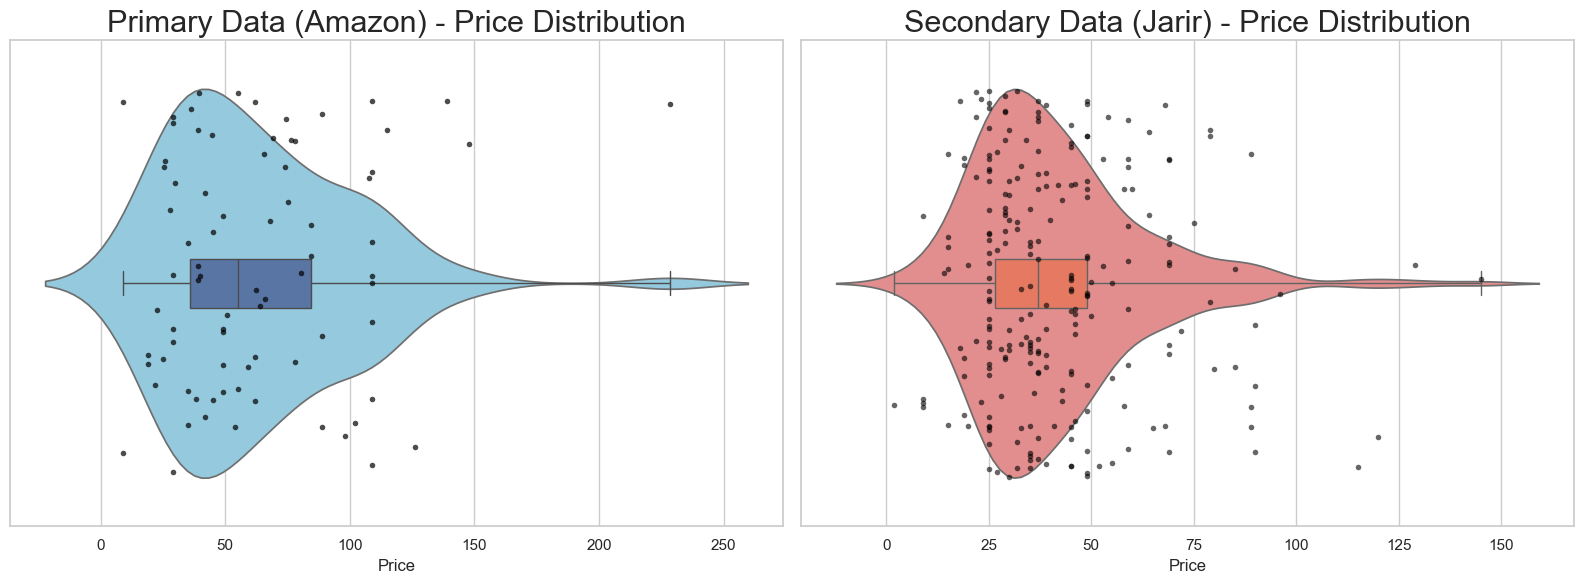

In [654]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot side-by-side 
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Raincloud plot for Price
sns.violinplot(ax=axes[0], x=prior_processed_amazon['Price'], color='skyblue', inner=None)
sns.boxplot(ax=axes[0], x=prior_processed_amazon['Price'], whis=[0, 100], width=0.1)
sns.stripplot(ax=axes[0], x=prior_processed_amazon['Price'], color='black', size=4, jitter=0.4,  alpha=0.7)
axes[0].set_title('Primary Data (Amazon) - Price Distribution', fontsize=22)

sns.violinplot(ax=axes[1], x=prior_processed_jarir['Price'], color='lightcoral', inner=None)
sns.boxplot(ax=axes[1], x=prior_processed_jarir['Price'], whis=[0, 100], width=0.1, palette="Reds_r")
sns.stripplot(ax=axes[1], x=prior_processed_jarir['Price'], color='black', size=4, jitter=0.4, alpha=0.6)
axes[1].set_title('Secondary Data (Jarir) - Price Distribution', fontsize=22)



# Adjust layout
plt.tight_layout()
plt.show()

### Primary Data (Amazon) - Price Insights
- Prices are widely distributed, ranging from very low to over 250.
- The distribution is right-skewed, meaning there are more affordable books and fewer high-priced books.
- The boxplot shows a high concentration of books around lower price ranges, but there are outliers in the high-price range. Mostly we will keep it, since it give insight of why it's bestseller.

### Secondary Data (Jarir)  - Price Insights
- Prices right-skewed but with a lower range (max ~150).
- The majority of books are priced below 75, with a significant concentration around lower values.
- Fewer extreme high-price outliers.

### Comparison of Key Metrics:
- Key Difference: Amazon offers a wider range of book prices, including high-end books, while Jarir focuses more on affordability.
  
### Contextualize Findings
**Validation of Primary Data:**
- The broad pricing range in Amazon aligns with expectations—Amazon features both budget-friendly books and premium editions.
- The presence of more expensive books suggests a higher diversity in book types and publishers on Amazon.

**Contradictions & Possible Explanations:**
- Jarir’s lower price range could be due to:
  - Different pricing strategies (e.g., local market pricing vs. international pricing).
  - Smaller book selection, possibly excluding high-end editions.
  - Currency exchange effects, making imported books more expensive.

### Raincloud Plot (Num Of Reviews)

C:\Users\Fahad\AppData\Local\Temp\ipykernel_25004\649994377.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




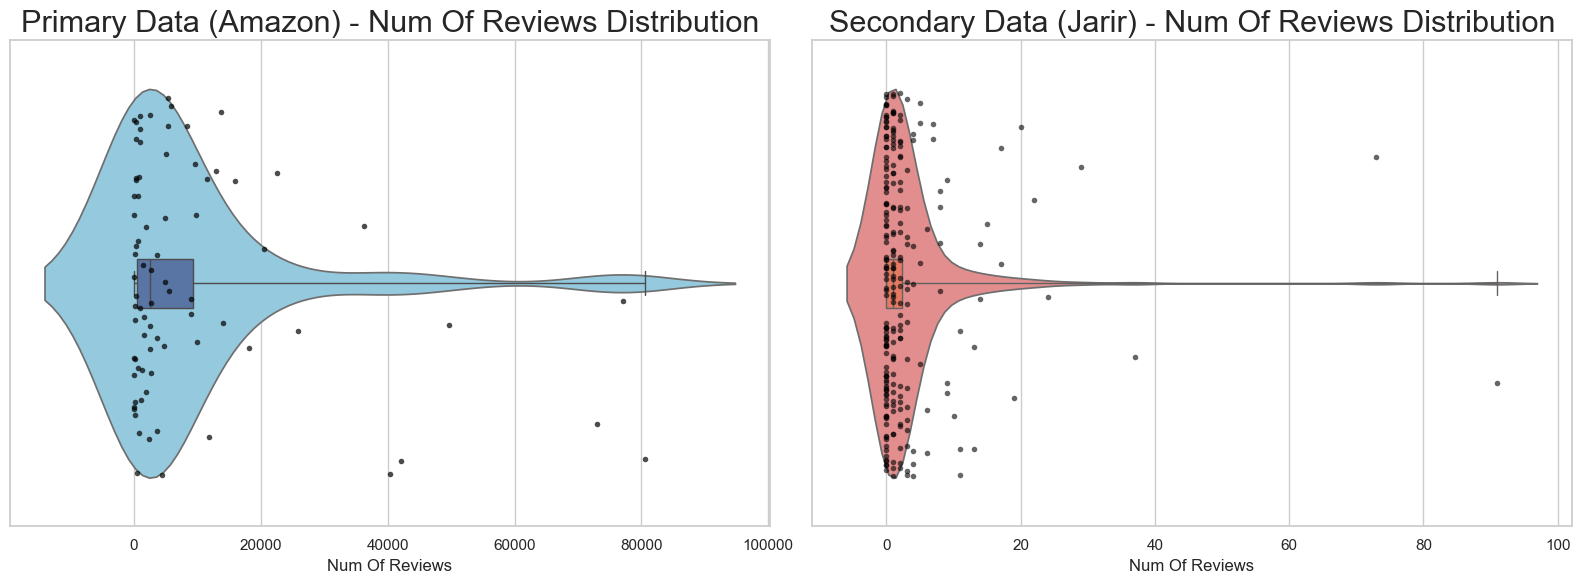

In [658]:
# Plot side-by-side 
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Raincloud plot for Price
sns.violinplot(ax=axes[0], x=prior_processed_amazon['Num Of Reviews'], color='skyblue', inner=None)
sns.boxplot(ax=axes[0], x=prior_processed_amazon['Num Of Reviews'], whis=[0, 100], width=0.1)
sns.stripplot(ax=axes[0], x=prior_processed_amazon['Num Of Reviews'], color='black', size=4, jitter=0.4,  alpha=0.7)
axes[0].set_title('Primary Data (Amazon) - Num Of Reviews Distribution', fontsize=22)

sns.violinplot(ax=axes[1], x=prior_processed_jarir['Num Of Reviews'], color='lightcoral', inner=None)
sns.boxplot(ax=axes[1], x=prior_processed_jarir['Num Of Reviews'], whis=[0, 100], width=0.1, palette="Reds_r")
sns.stripplot(ax=axes[1], x=prior_processed_jarir['Num Of Reviews'], color='black', size=4, jitter=0.4, alpha=0.6)
axes[1].set_title('Secondary Data (Jarir) - Num Of Reviews Distribution', fontsize=22)



# Adjust layout
plt.tight_layout()
plt.show()

### Primary Data (Amazon) - Num Of Reviews Insights
- The number of reviews varies greatly, with some books having close to 100,000 reviews.
- Distribution is right-skewed, with most books having a relatively low number of reviews, but a few extremely popular books have a very high count.
- The presence of books with massive review counts suggests a highly engaged user base.

### Secondary Data (Jarir)  - Num Of Reviews Insights
- The number of reviews is significantly lower overall.
- Most books have very few reviews, with very few books surpassing 100 reviews.
- 
### Comparison of Key Metrics:
- Key Difference: Amazon books receive far more reviews, indicating higher user engagement, while Jarir has minimal user interaction in reviews.

### Contextualize Findings

**Validation of Primary Data:**

- No appropriate validation can be derived from the secondary data. However, the distribution of reviews in the primary dataset (Amazon KSA) aligns with expectations for an online marketplace.
  
**Contradictions & Possible Explanations:**

- Jarir’s low review counts could be due to:
    - Lower website traffic and less customer engagement. 
    - Jarir late entry to E-commerce, so may its customer base was used to buying books in-store rather than leaving reviews online.
    - Cultural differences—users in certain regions may be less likely to leave reviews.
    - Fewer incentives to review (e.g., Amazon encourages reviews through algorithms and reminders).
    - Amazon’s data may have review bias—more popular books get more attention, leading to an overrepresentation of high-review books in the dataset.

###  Distribution Plot (Rating)

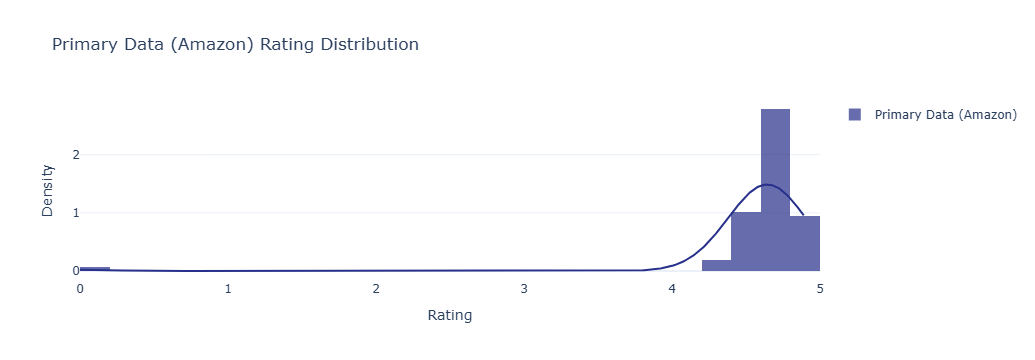

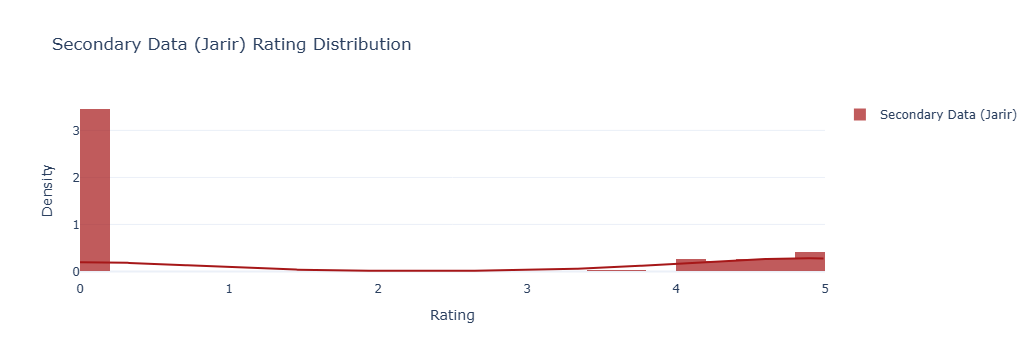

In [684]:
import plotly.figure_factory as ff
import numpy as np
import pandas as pd

# Sample Data (Replace with actual dataset)
np.random.seed(42)
primary_ratings = np.random.uniform(0, 4.9, 300)
secondary_ratings = np.random.uniform(0, 5, 300)

# Create separate plots
fig_primary = ff.create_distplot([prior_processed_amazon['Rating']], ["Primary Data (Amazon)"], 
                                 bin_size=0.2, show_hist=True, show_rug=False, colors=['#27308a'])

fig_secondary = ff.create_distplot([prior_processed_jarir['Rating']], ["Secondary Data (Jarir)"], 
                                   bin_size=0.2, show_hist=True, show_rug=False, colors=['#a61718'])

# Update layout for primary
fig_primary.update_layout(title="Primary Data (Amazon) Rating Distribution",
                          xaxis_title="Rating", yaxis_title="Density", template="plotly_white")

# Update layout for secondary
fig_secondary.update_layout(title="Secondary Data (Jarir) Rating Distribution",
                            xaxis_title="Rating", yaxis_title="Density", template="plotly_white")

# Show figures separately
fig_primary.show()
fig_secondary.show()


### Primary Data (Amazon) - Rating Insights
- The majority of books have high ratings (close to 5).
- The distribution is right-skewed, with a strong peak near 5.
- Very few books have ratings below 4.

### Secondary Data (Jarir)  - Rating Insights
- A large proportion of books have ratings near 0.
- Ratings are spread out across the spectrum, but the majority are either very low or very high.
- The pattern suggests either a lack of user engagement in rating books or a difference in rating culture.

### Comparison of Key Metrics:
- Amazon (Primary Data): Ratings are highly concentrated around 4.5-5, with very few low ratings.
- Jarir (Secondary Data): Ratings are bimodal, with a large portion around 0 and some around 4-5.
- Key Difference: Amazon books generally receive higher and more consistent ratings, while Jarir books show a mix of very low and very high ratings.
### Contextualize Findings
**Validation of Primary Data:**
- The Amazon dataset suggests that most books are well-rated, which aligns with general trends on large e-commerce platforms where customers tend to leave positive reviews.
High ratings could indicate popular and well-reviewed books with a strong reviewing culture among Amazon users.

**Contradictions & Possible Explanations:**
- The presence of many 0-rated books in Jarir suggests a difference in customer engagement—perhaps users on Jarir do not frequently rate books.
- Jarir’s lack of engagement in reviews could lead to books either having no ratings (defaulting to 0).
- Possible factors: Depend on external Rating, regional behavior, or platform mechanisms for leaving reviews.


###  **Categorical Attributes**
###  Lollipop plot (Auther)

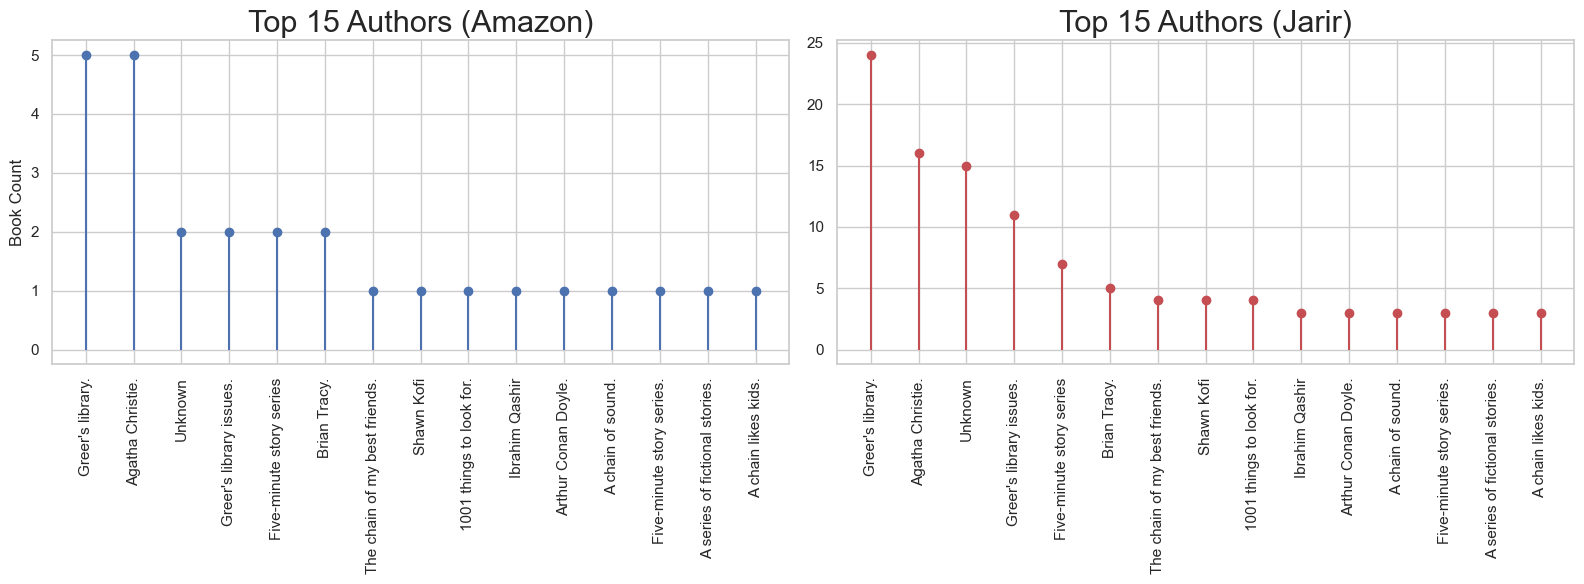

In [606]:
import matplotlib.pyplot as plt
import numpy as np

# Count the top 15 most frequent authors
top_authors_amazon = prior_processed_amazon["Author"].value_counts().nlargest(15)
top_authors_jarir = prior_processed_jarir["Author"].value_counts().nlargest(15)

# Define figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

# Amazon Lollipop Chart
axes[0].stem(top_authors_amazon.values, linefmt="b-", markerfmt="bo", basefmt=" ")
axes[0].set_xticks(np.arange(len(top_authors_amazon)))
axes[0].set_xticklabels(top_authors_amazon.index, rotation=90)
axes[0].set_title("Top 15 Authors (Amazon)", fontsize=22)
axes[0].set_ylabel("Book Count")

# Jarir Lollipop Chart
axes[1].stem(top_authors_jarir.values, linefmt="r-", markerfmt="ro", basefmt=" ")
axes[1].set_xticks(np.arange(len(top_authors_jarir)))
axes[1].set_xticklabels(top_authors_jarir.index, rotation=90)
axes[1].set_title("Top 15 Authors (Jarir)", fontsize=22)

plt.tight_layout()
plt.show()


**Note:** We do not unify the scale since excessive white space would be annoying and make interpretation difficult. Always keep in mind that the primary dataset (Amazon) is smaller in size than the secondary dataset (Jarir).

### Primary Data (Amazon) - Author Insights
**Most Frequent Authors:**
1. Greer’s Library (translated from Arabic, actually Jarir Bookstore) and Agatha Christie have the highest number of books (~5 each).
2. Most other authors have only 1-2 books, indicating a broad diversity of authors with relatively small individual contributions.
**Interpretation**
Amazon’s catalog seems to contain a mix of well-known and niche authors, providing a wider selection.

### Secondary Data (Jarir) - Author Insights
**Most Frequent Authors:**
1. Greer’s Library (Jarir Bookstore) is the dominant author, with ~25 books.
2. Agatha Christie also has a stronger presence (~15 books).
3. Other authors have a gradual drop in count.
4. Seeing Unknown as one of the top-ranked authors is unusual and suggests potential data issues or an interesting pattern.

### Comparison of Key Metrics
| **Metric**               | **Amazon (Primary)**      | **Jarir (Secondary)**  |
|-------------------------|------------------------|----------------------|
| **Most Common Author**   | Greer’s Library (5 books) | Greer’s Library (25 books) |
| **Second Most Common**   | Agatha Christie (5 books) | Agatha Christie (15 books) |
| **Average Books per Author** | ~1.5 | ~3.2 |

### Contextualize Findings

**Validation of Primary Data:**

- The pattern of Greer’s Library and Agatha Christie being top authors exists in both datasets, confirming that these authors are genuinely popular.
- This suggests that the primary data is reliable in identifying key authors. 


**.
Contradictions & Possible Explanatio**ns:
- The book count per author is much higher in Jarir, which is mostly due **Jarir having a wider dataset**. 
  

### Findings
-  **Jarir has a higher concentration** of books from top authors compared to Amazon.
-  **Amazon has a more diverse author distribution**, with a wider range of unique authors but fewer books per author.
-   The dominance of *Greer’s Library (Jarir)* is much **stronger in Jarir’s dataset** than in Amazon’s.
-  Since **Jarir is a well-established bookstore**, its published and distributed books dominate bestsellers.
- **"Unknown"** appears in the top three in both datasets, which is unusual and suggests either data issues or an interesting market trend.
  ##### Possible Explanations
   - Data Entry Issues or Missing Information.
   - Books Popular for Their Content, Not the Author.
   - Possible Dominance of Anonymous or Collective Works: Some books may be written by multiple authors, institutions.

- **Merging** "Greer Library" and "Greer Library Issues".

### 2. Barplot (Genre)

C:\Users\Fahad\AppData\Local\Temp\ipykernel_25004\2160773682.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_counts_amazon.index, x=genre_counts_amazon.values, ax=axes[0], palette="Blues_r")
C:\Users\Fahad\AppData\Local\Temp\ipykernel_25004\2160773682.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_counts_jarir.index, x=genre_counts_jarir.values, ax=axes[1], palette="Reds_r")


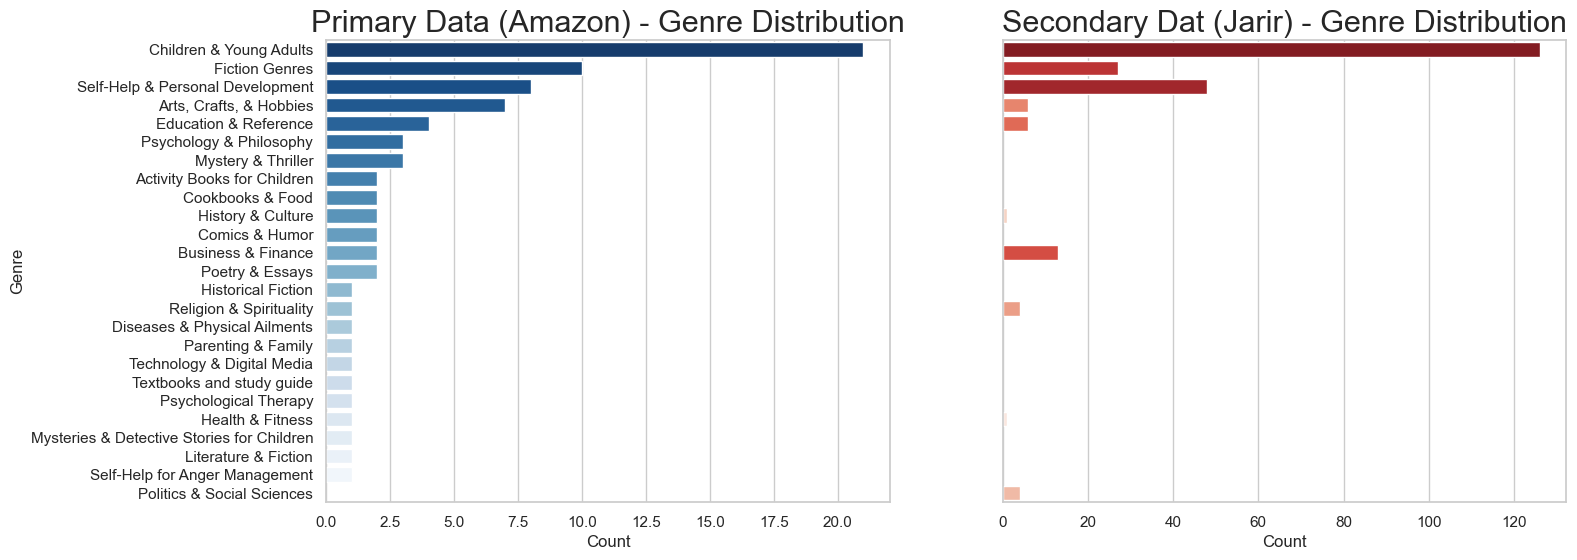

In [608]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each genre
genre_counts_amazon = prior_processed_amazon["Genre"].value_counts()
genre_counts_jarir = prior_processed_jarir["Genre"].value_counts()

# Plot side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.barplot(y=genre_counts_amazon.index, x=genre_counts_amazon.values, ax=axes[0], palette="Blues_r")
axes[0].set_title("Primary Data (Amazon) - Genre Distribution", fontsize=22)
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Genre")

sns.barplot(y=genre_counts_jarir.index, x=genre_counts_jarir.values, ax=axes[1], palette="Reds_r")
axes[1].set_title("Secondary Dat (Jarir) - Genre Distribution", fontsize=22)
axes[1].set_xlabel("Count")
axes[1].set_ylabel("")

plt.show()


**Note:** We do not unify the scale since excessive white space would be annoying and make interpretation difficult. Always keep in mind that the primary dataset (Amazon) is smaller in size than the secondary dataset (Jarir).

### Primary Data (Amazon) - Genre Insights

- **Prominent Genres:** The "Children & Young Adults" genre dominates with the highest count, followed by "Fiction Genres," "Self-Help & Personal Development," and other categories such as "Arts, Crafts, & Hobbies" and "Psychology & Philosophy." 
- The count distribution in Amazon data is fairly wide across genres, with a noticeable peak for the top genres (especially "Children & Young Adults"), tapering off as the genres become more niche. 
   
### Secondary Data (Jarir) - Genre Insights
- **Prominent Genres:** The "Children & Young Adults" genre leads in the Jarir dataset, but there is a much steeper drop-off in counts for genres after the initial leading genre.
- The rest of the genres, including "Fiction Genres" and "Self-Help & Personal Development," have a relatively lower count. This suggests that Jarir focuses more heavily on a specific set of genres, with “Children & Young Adults” standing out far more prominently in comparison to Amazon.

### Comparison Key Metrics


| Metric               | **Primary Data (Amazon)**         | **Secondary Data (Jarir)**       |
|----------------------|-----------------------------------|----------------------------------|
| **Most Frequent Genre**  | "Children & Young Adults"         | "Children & Young Adults"        |
| **Top 3 Genres (Count)** | "Children & Young Adults," "Fiction Genres," "Self-Help & Personal Development" | "Children & Young Adults," "Fiction Genres," "Self-Help & Personal Development" |
| **Average Count**     | Varied (around 5-10 counts per genre) | Very skewed towards "Children & Young Adults" |

From the table above, it is clear that both datasets share common genres but differ significantly in the spread of counts.


### Contextualize Findings

**Validation of Primary Data:**
- Consistency in Popular Genres: "Children & Young Adults" dominanate in both datasets, confirming the validity of the primary data in reflecting general trends in the market.

**Comparison and Contradictions**:

   - The contrast between the broad range of genres in Amazon and the more niche focus in Jarir raises questions about the **sampling and market differences**. Amazon's wider genre distribution might point to a global reach, with diversified customer interests, whereas Jarir could be serving a specific market where children’s literature is a priority.

### 4 - Graphical , Multivariate

# 5. Data Preprocessing (After EDA)

Here we start process the dataset of all primary and secondary after integration 

## Processe Integreted Dataset

### Handling Duplicate Rows and Data Aggregation
In this section, we normalized the 'Title' column by converting text to lowercase and removing extra spaces to standardize comparisons. Duplicate rows were identified based on the cleaned title and author columns. We then aggregated the duplicates by calculating the mean for numeric columns, summing 'Num Of Reviews', and concatenating unique values in text columns like 'Book Type' and 'Genre'. Finally, the results were displayed in a formatted table using the `tabulate()` library for clear and structured visualization.

In [ ]:
import pandas as pd
from tabulate import tabulate


# Clean and normalize text in the 'Title' column (convert to lowercase and remove extra spaces)
rawBooks_df['Title Clean'] = rawBooks_df['Title'].str.lower().str.strip()

# Identify duplicate rows based on the cleaned 'Title' and 'Author' columns
potential_duplicates = rawBooks_df[rawBooks_df.duplicated(subset=['Title Clean', 'Author'], keep=False)]

# Print duplicate rows to verify
print("Duplicate rows before processing:")
print(potential_duplicates)

# Aggregate duplicate rows by calculating average and sum for numeric columns, and merging unique values for text columns
aggregated_duplicates = potential_duplicates.groupby(
    ['Title Clean', 'Author']
).agg({
    'Price': 'mean',
    'Rating': 'mean',
    'Num Of Reviews': 'sum',
    'Book Type': lambda x: ', '.join(x.unique()),
    'Genre': lambda x: ', '.join(x.unique())
}).reset_index()

# Formatting the numeric columns
aggregated_duplicates['Price'] = aggregated_duplicates['Price'].astype(int)  # Remove decimals
aggregated_duplicates['Rating'] = aggregated_duplicates['Rating'].round(1)   # Keep one decimal place

# Rename the cleaned title column back to 'Title'
aggregated_duplicates.rename(columns={'Title Clean': 'Title'}, inplace=True)

# Add a cover image link to the aggregated duplicates
aggregated_duplicates['Cover Image'] = 'https://images-eu.ssl-images-amazon.com/images/I/81E3hDPr3eL._AC_UL300_SR300,200_.jpg'

# Remove duplicate rows from the original DataFrame
rawBooks_df.drop_duplicates(subset=['Title Clean', 'Author'], keep=False, inplace=True)

# Drop the 'Title Clean' column
rawBooks_df.drop(columns='Title Clean', inplace=True)

# Merge the aggregated duplicates back into the original DataFrame
rawBooks_df = pd.concat([rawBooks_df, aggregated_duplicates], ignore_index=True)

# Print the processed rows
print("\nProcessed aggregated rows:")
print(tabulate(aggregated_duplicates, headers='keys', tablefmt='grid', showindex=False))

###  Normalization
- We will use normalization for the 'Num Of Reviews' column because the values vary widely, and we need to simplify them. We chose the Min-Max scaling method because it is the most suitable for this case. By normalizing the data to a scale from 0 to 5, we can align it with the 'Rating' column, which also has values ranging from 0 to 5. This ensures that both columns are on a similar scale and can be more easily compared.
We used MinMaxScalerc class provided by the sklearn.preprocessing module, which is part of the scikit-learn library to do normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 5))

# Normalize the"Num of Reviews" columns
rawBooks_df[['Num Of Reviews']] = scaler.fit_transform(rawBooks_df[['Num Of Reviews']])
rawBooks_df

### Discretization and Encoding 

- We noticed that the 'Price' column contains continuous values, which need to be processed in a way that makes them simpler to handle. We decided to first perform discretization by dividing the values into five labels using bins. The labels range from 'Very Low' to 'Very High'. After discretization, we applied encoding and mapped these labels ordinally from 0 to 4 to simplify feature processing.



In [ ]:
# Get the min and max of the Price column to understand the range
min_price = rawBooks_df['Price'].min()
max_price = rawBooks_df['Price'].max()

print(f"Min Price: {min_price}, Max Price: {max_price}")

# Define bin edges using quantiles (5 bins based on price distribution)
bin_edges = [min_price,
             rawBooks_df['Price'].quantile(0.2),
             rawBooks_df['Price'].quantile(0.4),
             rawBooks_df['Price'].quantile(0.6),
             rawBooks_df['Price'].quantile(0.8),
             max_price]

# Define labels for each bin
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Apply discretization using pd.cut()
rawBooks_df['Price'] = pd.cut(rawBooks_df['Price'], bins=bin_edges, labels=bin_labels, right=False)



rawBooks_df

In [ ]:
# Encode labels to integers
label_encoding = {'Very Low': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
rawBooks_df['Price'] = rawBooks_df['Price'].map(label_encoding)
rawBooks_df

## References

1. A. Alharbi, "Exploring Factors Influencing the Amazon Best-Selling Books Selection Process from 2009 to 2019," ResearchGate, 2024. [Online]. Available: https://www.researchgate.net/publication/382998978_Exploring_Factors_Influencing_the_Amazon_Best-Selling_Books_Selection_Process_from_2009_to_2019.

2. J. Smith and J. Doe, "Using Full-Text Content to Characterize and Identify Best Seller Books," PLOS ONE, May 11, 2023. [Online]. Available: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0302070.

3. L. Johnson and K. Brown, "Analyzing Social Book Reading Behavior on Goodreads and How It Predicts Amazon Best Sellers," ResearchGate, 2018. [Online]. Available: https://www.researchgate.net/publication/327789907_Analyzing_Social_Book_Reading_Behavior_on_Goodreads_and_how_it_predicts_Amazon_Best_Sellers.
4. Hurix Digital, "Knowing the Psychology of Book Cover Design," Hurix Blogs, 2023. [Online]. Available: [https://www.hurix.com/blogs/knowing-the-psychology-of-book-cover-design](https://www.hurix.com/blogs/knowing-the-psychology-of-book-cover-design).